In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d xhlulu/140k-real-and-fake-faces
!unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
training_gen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
training_set=training_gen.flow_from_directory('/content/real_vs_fake/real-vs-fake/train',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 100000 images belonging to 2 classes.


In [ ]:
test_gen=ImageDataGenerator(rescale=1/255)

In [ ]:
test_set=test_gen.flow_from_directory('/content/real_vs_fake/real-vs-fake/test',
                  target_size=(64,64),
                  batch_size=32,
                  class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn=models.Sequential([layers.Conv2D(filters=64,kernel_size=3,padding='same',input_shape=(64,64,3)),
                       layers.BatchNormalization(),
                       layers.LeakyReLU(),
                       layers.AveragePooling2D(pool_size=2,strides=2),
                       layers.Conv2D(filters=32,kernel_size=3,padding='same'),
                       layers.BatchNormalization(),
                       layers.LeakyReLU(),
                       layers.AveragePooling2D(pool_size=2,strides=2),
                       layers.Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(64,64,3)),
                       layers.BatchNormalization(),
                       layers.LeakyReLU(),
                       layers.MaxPool2D(pool_size=2,strides=2),
                       layers.Flatten(),
                       layers.Dense(64),
                       layers.LeakyReLU(),
                       layers.Dropout(0.2),
                       layers.Dense(32),
                       layers.Dropout(0.2),
                       layers.LeakyReLU()
                       ])
cnn.add(layers.Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#import tensorflow as tf

#checkpoint_path = "Deepfake.keras"
#checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                         save_weights_only=False,
#                                                         save_best_only=False,
#                                                        verbose=1)


In [ ]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model = cnn.fit(x=training_set,validation_data=test_set,epochs=200)

In [ ]:
cnn.save('my_model1.h5')


In [ ]:
# Load the model
import tensorflow
model = tensorflow.keras.models.load_model('/content/deepfake(11)140epochs.keras')

In [ ]:
data=model.fit(x=training_set,validation_data=test_set,epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 356s 110ms/step - accuracy: 0.9594 - loss: 0.1067 - val_accuracy: 0.9574 - val_loss: 0.1151
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 272s 87ms/step - accuracy: 0.9593 - loss: 0.1051 - val_accuracy: 0.9486 - val_loss: 0.1349
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 269s 86ms/step - accuracy: 0.9595 - loss: 0.1048 - val_accuracy: 0.9530 - val_loss: 0.1273
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 267s 85ms/step - accuracy: 0.9578 - loss: 0.1077 - val_accuracy: 0.9547 - val_loss: 0.1212
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 260s 83ms/step - accuracy: 0.9616 - loss: 0.1002 - val_accuracy: 0.9538 - val_loss: 0.1213
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 264s 84ms/step - accuracy: 0.9596 - loss: 0.1047 - val_accuracy: 0.9416 - val_loss: 0.1636
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 263s 84ms/step - accuracy: 0.9598 - loss: 0.1029 - val_accuracy: 0.9556 - val_loss: 0.1188
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 261s 83ms/step - accuracy: 0.9597 - l

In [ ]:
model.save('deepfake(12)150epochs.keras')


In [ ]:
model.fit(x=training_set,validation_data=test_set,epochs=10)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 293s 94ms/step - accuracy: 0.9593 - loss: 0.1029 - val_accuracy: 0.9543 - val_loss: 0.1234
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 261s 83ms/step - accuracy: 0.9606 - loss: 0.1017 - val_accuracy: 0.9460 - val_loss: 0.1412
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 261s 83ms/step - accuracy: 0.9611 - loss: 0.1018 - val_accuracy: 0.9573 - val_loss: 0.1140
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 253s 81ms/step - accuracy: 0.9606 - loss: 0.1021 - val_accuracy: 0.9603 - val_loss: 0.1072
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 257s 82ms/step - accuracy: 0.9610 - loss: 0.1026 - val_accuracy: 0.9514 - val_loss: 0.1293
Epoch 6/10
2365/3125 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9616 - loss: 0.1002

In [ ]:
model.save('deepfake(13)160epochs.keras')

In [ ]:
model.fit(x=training_set,validation_data=test_set,epochs=10)

In [ ]:
model.fit(x=training_set,validation_data=test_set,epochs=10)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 313s 100ms/step - accuracy: 0.9407 - loss: 0.1502 - val_accuracy: 0.9398 - val_loss: 0.1516
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 329s 102ms/step - accuracy: 0.9423 - loss: 0.1454 - val_accuracy: 0.9402 - val_loss: 0.1521
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 337s 107ms/step - accuracy: 0.9421 - loss: 0.1469 - val_accuracy: 0.9299 - val_loss: 0.1806
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 383s 107ms/step - accuracy: 0.9428 - loss: 0.1441 - val_accuracy: 0.9391 - val_loss: 0.1555
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 367s 102ms/step - accuracy: 0.9426 - loss: 0.1439 - val_accuracy: 0.9453 - val_loss: 0.1406
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 345s 110ms/step - accuracy: 0.9430 - loss: 0.1450 - val_accuracy: 0.9474 - val_loss: 0.1368
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 327s 104ms/step - accuracy: 0.9471 - loss: 0.1377 - val_accuracy: 0.9473 - val_loss: 0.1360
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 312s 100ms/step - ac

In [ ]:
model.save("deepfake(6)70epochs.keras")

In [ ]:
model.fit(x=training_set,validation_data=test_set,epochs=5)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 313s 100ms/step - accuracy: 0.9453 - loss: 0.1406 - val_accuracy: 0.9283 - val_loss: 0.1855
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 275s 88ms/step - accuracy: 0.9468 - loss: 0.1360 - val_accuracy: 0.9459 - val_loss: 0.1406
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 298s 95ms/step - accuracy: 0.9459 - loss: 0.1384 - val_accuracy: 0.9380 - val_loss: 0.1564
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 301s 96ms/step - accuracy: 0.9463 - loss: 0.1362 - val_accuracy: 0.9210 - val_loss: 0.2024
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 279s 89ms/step - accuracy: 0.9452 - loss: 0.1356 - val_accuracy: 0.9496 - val_loss: 0.1322


In [ ]:
model.fit(x=training_set,validation_data=test_set,epochs=5)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 295s 94ms/step - accuracy: 0.9470 - loss: 0.1341 - val_accuracy: 0.9462 - val_loss: 0.1410
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9482 - loss: 0.1323

In [ ]:
accuracy=[0.6341, 0.7188, 0.7458, 0.7661, 0.7819, 0.7936, 0.8036, 0.8143, 0.8199, 0.8310, 0.8355, 0.8435, 0.8487, 0.8550, 0.8591, 0.8616, 0.8665, 0.8705, 0.8731, 0.8774, 0.8788, 0.8840, 0.8847, 0.8879, 0.8886, 0.8919, 0.8940, 0.8950, 0.8993, 0.8999, 0.8998, 0.9047, 0.9029, 0.9044, 0.9060, 0.9102, 0.9102, 0.9120, 0.9108, 0.9131, 0.9114, 0.9156, 0.9184, 0.9185, 0.9212, 0.9239, 0.9286, 0.9310, 0.9353, 0.9358, 0.9367, 0.9377, 0.9385, 0.9394, 0.9391, 0.9388, 0.9387, 0.9417, 0.9416, 0.9408, 0.9409, 0.9413, 0.9407, 0.9418, 0.9418, 0.9422, 0.9451, 0.9458, 0.9429, 0.9449, 0.9439, 0.9448, 0.9454, 0.9453, 0.9453, 0.9454, 0.9473, 0.9479, 0.9445, 0.9466, 0.9487, 0.9477, 0.9470, 0.9482, 0.9494, 0.9481, 0.9486, 0.9487, 0.9505, 0.9499, 0.9512, 0.9516, 0.9511, 0.9519, 0.9517, 0.9520, 0.9528, 0.9534, 0.9544, 0.9521, 0.9527, 0.9539, 0.9548, 0.9550, 0.9539, 0.9553, 0.9553, 0.9522, 0.9537, 0.9557, 0.9553, 0.9547, 0.9550, 0.9567, 0.9543, 0.9568, 0.9580, 0.9568, 0.9570, 0.9555, 0.9575, 0.9534, 0.9582]
loss    =[0.6489, 0.5507, 0.5172, 0.4882, 0.4653, 0.4431, 0.4282, 0.4096, 0.3982, 0.3809, 0.3728, 0.3586, 0.3476, 0.3376, 0.3266, 0.3233, 0.3118, 0.3038, 0.2996, 0.2902, 0.2865, 0.2786, 0.2758, 0.2680, 0.2677, 0.2597, 0.2579, 0.2501, 0.2448, 0.2455, 0.2419, 0.2354, 0.2356, 0.2343, 0.2299, 0.2226, 0.2220, 0.2158, 0.2181, 0.2152, 0.2162, 0.2085, 0.2075, 0.2054, 0.2005, 0.2028, 0.1968, 0.1942, 0.1909, 0.1706, 0.1607, 0.1618, 0.1595, 0.1562, 0.1565, 0.1529, 0.1565, 0.1534, 0.1541, 0.1488, 0.1483, 0.1501, 0.1480, 0.1473, 0.1488, 0.1466, 0.1460, 0.1492, 0.1418, 0.1392, 0.1435, 0.1419, 0.1422, 0.1417, 0.1385, 0.1390, 0.1394, 0.1396, 0.1342, 0.1359, 0.1389, 0.1360, 0.1342, 0.1333, 0.1354, 0.1306, 0.1285, 0.1328, 0.1318, 0.1308, 0.1272, 0.1282, 0.1270, 0.1259, 0.1234, 0.1256, 0.1228, 0.1227, 0.1236, 0.1220, 0.1215, 0.1210, 0.1203, 0.1216, 0.1171, 0.1185, 0.1179, 0.1162, 0.1145, 0.1217, 0.1190, 0.1145, 0.1168, 0.1160, 0.1157, 0.1129, 0.1167, 0.1123, 0.1106, 0.1119, 0.1116, 0.1123, 0.1098]
val_acc =[0.7289, 0.7422, 0.7558, 0.7696, 0.7923, 0.8212, 0.8216, 0.7941, 0.8285, 0.8339, 0.8345, 0.8508, 0.8441, 0.8450, 0.8740, 0.8515, 0.8625, 0.8374, 0.8510, 0.8556, 0.8698, 0.8940, 0.8809, 0.8854, 0.8942, 0.9001, 0.9019, 0.8898, 0.9049, 0.9011, 0.9025, 0.8562, 0.9008, 0.9186, 0.9194, 0.9180, 0.9197, 0.9144, 0.9114, 0.9146, 0.9051, 0.9212, 0.8917, 0.9172, 0.9178, 0.9033, 0.9118, 0.9153, 0.9154, 0.9176, 0.9189, 0.9355, 0.9302, 0.9328, 0.9350, 0.9349, 0.9421, 0.9247, 0.9396, 0.9081, 0.9444, 0.9445, 0.9396, 0.9415, 0.9457, 0.9388, 0.9308, 0.9389, 0.9202, 0.9357, 0.9079, 0.9400, 0.9412, 0.9431, 0.9406, 0.9465, 0.9229, 0.9400, 0.9489, 0.9415, 0.9443, 0.9487, 0.9302, 0.9423, 0.9499, 0.9498, 0.9510, 0.9533, 0.9288, 0.9482, 0.9488, 0.9509, 0.9402, 0.9483, 0.9515, 0.9512, 0.9506, 0.9502, 0.9520, 0.9424, 0.9513, 0.9527, 0.9520, 0.9495, 0.9531, 0.9556, 0.9495, 0.9531, 0.9556, 0.9434, 0.9535, 0.9427, 0.9495, 0.9438, 0.9392, 0.9367, 0.9523, 0.9504, 0.9491, 0.9565, 0.9584, 0.9499, 0.9563]
val_loss=[0.5476, 0.5151, 0.4987, 0.4799, 0.4417, 0.4063, 0.3922, 0.4355, 0.3855, 0.3740, 0.3668, 0.3421, 0.3563, 0.3449, 0.2965, 0.3385, 0.3213, 0.3601, 0.3394, 0.3286, 0.3051, 0.2564, 0.2848, 0.2701, 0.2585, 0.2442, 0.2397, 0.2616, 0.2303, 0.2401, 0.2369, 0.3403, 0.2359, 0.2044, 0.2037, 0.2050, 0.2004, 0.2143, 0.2201, 0.2114, 0.2373, 0.1942, 0.2599, 0.2100, 0.2050, 0.2346, 0.2202, 0.2129, 0.1901, 0.1923, 0.1939, 0.1573, 0.1797, 0.1667, 0.1658, 0.1640, 0.1435, 0.1901, 0.1565, 0.2316, 0.1455, 0.1446, 0.1534, 0.1527, 0.1421, 0.1539, 0.1582, 0.1748, 0.1567, 0.2037, 0.1603, 0.2336, 0.1543, 0.1523, 0.1460, 0.1545, 0.1386, 0.1915, 0.1503, 0.1307, 0.1507, 0.1480, 0.1344, 0.1797, 0.1498, 0.1298, 0.1318, 0.1269, 0.1223, 0.1805, 0.1367, 0.1349, 0.1279, 0.1480, 0.2032, 0.1334, 0.1279, 0.1324, 0.1280, 0.1273, 0.1484, 0.1301, 0.1231, 0.1287, 0.1332, 0.1215, 0.1157, 0.1527, 0.1243, 0.1494, 0.1311, 0.1494, 0.1311, 0.1494, 0.1617, 0.1619, 0.1245, 0.1281, 0.1306, 0.1175, 0.1086, 0.1330, 0.1154]


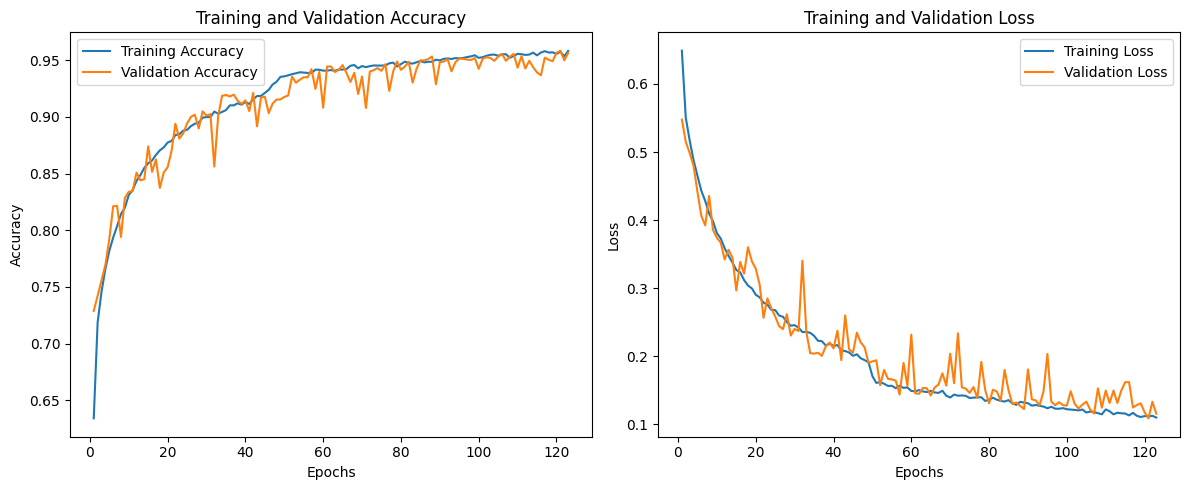

In [ ]:
import matplotlib.pyplot as plt

# Define the number of epochs (assuming it corresponds to the length of the data)
epochs = range(1, len(accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
